In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
######## PART 1 ########

In [3]:
"""
extracting the mean vectors and the covariance matrix.
have to reshape the mean vectors (dimensions - (1, 20)) 
since np.random.multivariate_normal() requires that the
mean vector be one-dimensional.
"""
neg_class_mean_vector = np.array(pd.read_csv('./hwk2_datasets/DS1_m_0.txt', header=None)).T.reshape(20)
pos_class_mean_vector = np.array(pd.read_csv('./hwk2_datasets/DS1_m_1.txt', header=None)).T.reshape(20)
cov_matrix = np.array(pd.read_csv('./hwk2_datasets/DS1_Cov.txt', header=None))

In [4]:
"""
generating the two classes (20 features each),
using the mean vectors and covariance matrix,
each containing 2000 examples
"""
pos_features_df = pd.DataFrame(data=np.random.multivariate_normal(pos_class_mean_vector, cov_matrix, size=2000))
neg_features_df = pd.DataFrame(data=np.random.multivariate_normal(neg_class_mean_vector, cov_matrix, size=2000))

In [5]:
"""
generating the class labels for the 2 classes
which will be added to the DataFrame made above
"""
pos_class_column = pd.Series([1 for x in range(2000)])
neg_class_column = pd.Series([0 for x in range(2000)])

In [6]:
"""
adding the columns with class labels to
the respective DataFrames for the 2 classes
"""
pos_class_df = pd.concat([pos_features_df, pos_class_column], axis=1, ignore_index=True)
neg_class_df = pd.concat([neg_features_df, neg_class_column], axis=1, ignore_index=True)

In [7]:
"""
extracting a 20% sample for the test set
from both the positive and negative classes
"""
test_df_pos_class = pos_class_df.sample(frac=0.2)
test_df_neg_class = neg_class_df.sample(frac=0.2)
test_df = pd.concat([test_df_pos_class, test_df_neg_class], ignore_index=True)

In [8]:
"""
for the valid set, getting those records 
from the total which are not present in 
the test set and getting a 25% sample from
that. a 25% sample from the (total-test set)
is equivalent to 20% of the total.
"""
valid_df_pos_class = pos_class_df.loc[~pos_class_df.index.isin(test_df_pos_class.index)].sample(frac=0.25)
valid_df_neg_class = neg_class_df.loc[~neg_class_df.index.isin(test_df_neg_class.index)].sample(frac=0.25)
valid_df = pd.concat([valid_df_pos_class, valid_df_neg_class], ignore_index=True)

In [9]:
"""
getting all records for both positive and
negative classes which are not a part of 
either the test set or valid set. combining
the resultant positive, negative class records
to obtain the training set.
"""
not_train_df_pos_class = pd.concat([test_df_pos_class, valid_df_pos_class])
train_df_pos_class = pos_class_df.loc[~pos_class_df.index.isin(not_train_df_pos_class.index)]

not_train_df_neg_class = pd.concat([test_df_neg_class, valid_df_neg_class])
train_df_neg_class = neg_class_df.loc[~neg_class_df.index.isin(not_train_df_neg_class.index)]

train_df = pd.concat([train_df_pos_class, train_df_neg_class], ignore_index=True)

In [10]:
"""
function to verify/check
the shapes of the DataFrames
"""
def check_shape(df, name):
    print(name, ":")
    print("Positive class:", df.loc[df[20] == 1].shape)
    print("Negative class:", df.loc[df[20] == 0].shape)
    print()

In [11]:
check_shape(test_df, "Test")
check_shape(valid_df, "Valid")
check_shape(train_df, "Train")

Test :
Positive class: (400, 21)
Negative class: (400, 21)

Valid :
Positive class: (400, 21)
Negative class: (400, 21)

Train :
Positive class: (1200, 21)
Negative class: (1200, 21)



In [12]:
"""
generating csv files for the 
3 data sets for submission
"""
train_df.to_csv("DS1_train.csv")
valid_df.to_csv("DS1_valid.csv")
test_df.to_csv("DS1_test.csv")

In [13]:
######## PART 2 ########

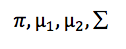

In [14]:
"""
Parameters for the GDA model
"""
Image(filename='./pics/gda_params.png')

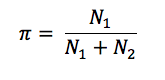

In [15]:
"""
Estimating pi
"""
Image(filename='./pics/gda_pi.png')

In [16]:
num_pos_class = train_df_pos_class.shape[0]
num_neg_class = train_df_neg_class.shape[0]
pi = num_pos_class/(num_pos_class+num_neg_class)

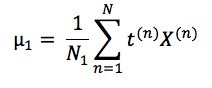

In [17]:
"""
Estimating mu_one
"""
Image(filename='./pics/gda_mu_one.png')

In [18]:
"""
since we already have the positive class
separately we don't need to go over the
combined positive and negative classes
"""
m1_data = (train_df_pos_class.drop([20], axis=1).sum(axis=0))/num_pos_class
mu_one = pd.DataFrame(data=m1_data)

In [19]:
mu_one #TOREMOVE

,0
0,1.899646
1,1.881167
2,1.926632
3,1.883567
4,1.826033
5,1.958006
6,1.905135
7,1.919432
8,1.974790
9,1.893557


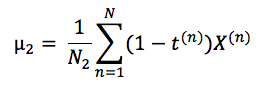

In [20]:
"""
Estimating mu_two
"""
Image(filename='./pics/gda_mu_two.png')

In [21]:
"""
once again, since we already have the negative class
separately we don't need to go over the
combined positive and negative classes
"""
m2_data = (train_df_neg_class.drop([20], axis=1).sum(axis=0))/num_neg_class
mu_two = pd.DataFrame(data=m2_data)

In [22]:
mu_two #TOREMOVE

,0
0,1.419150
1,1.420048
2,1.358109
3,1.402855
4,1.415983
5,1.345684
6,1.402886
7,1.366259
8,1.361484
9,1.437750


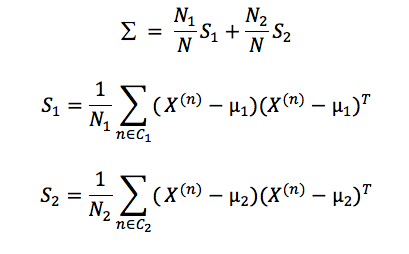

In [49]:
"""
Estimating sigma
"""
Image(filename='./pics/gda_sigma.png')

In [50]:
def generate_variance_matrix(df, mu, num_entries):
    variance_df = pd.DataFrame(data=[[0 for i in range(20)] for j in range(20)])
    for idx, row in df.drop([20], axis=1).iterrows():
        row = pd.DataFrame(data=row)
        row.columns = [0]
        diff = row.subtract(mu)
        single_example_entry = diff.dot(diff.T)
        variance_df += single_example_entry
    
    variance_df = variance_df.divide(num_entries)
    return variance_df

In [52]:
s1_df = generate_variance_matrix(train_df_pos_class, mu_one, num_pos_class)
s2_df = generate_variance_matrix(train_df_neg_class, mu_two, num_neg_class)

In [53]:
num_total_class = num_pos_class + num_neg_class
sigma = s1_df.multiply(num_pos_class/num_total_class) + s2_df.multiply(num_neg_class/num_total_class)

In [56]:
sigma

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,8.128767,5.750745,6.500128,5.445313,6.180238,6.444423,4.955550,5.707258,5.294229,5.418138,4.160489,5.582801,7.315306,6.320623,6.336260,6.346231,6.306650,5.943281,5.902092,6.052477
1,5.750745,7.092864,5.690109,4.591404,5.709350,5.839232,4.629402,4.175321,4.358416,5.146174,3.507841,4.833133,6.029676,5.336741,5.700453,5.519778,5.952593,5.251351,5.583137,5.443794
2,6.500128,5.690109,7.650002,5.186099,6.151666,6.937804,4.928633,5.176711,5.182880,5.375848,3.537730,5.064095,6.696759,5.574838,6.414992,6.414224,6.700025,5.331555,5.123444,5.352799
3,5.445313,4.591404,5.186099,5.960436,5.581577,4.813345,3.994165,4.650918,3.630251,4.386076,2.955925,4.460357,6.131056,5.075640,5.086408,5.440307,5.036935,4.801998,4.282655,5.961678
4,6.180238,5.709350,6.151666,5.581577,7.395649,5.740431,5.353372,4.675608,4.953832,5.319911,4.290596,5.352326,6.474633,6.136084,6.275352,6.568987,6.343742,5.398786,5.672840,5.920979
5,6.444423,5.839232,6.937804,4.813345,5.740431,7.057108,4.754474,5.200545,5.012389,5.547115,3.218312,5.156264,6.645174,5.341133,6.076928,6.348269,6.358862,5.261562,5.136512,5.413541
6,4.955550,4.629402,4.928633,3.994165,5.353372,4.754474,5.444742,4.153583,4.200276,4.556389,3.247619,4.639988,4.949851,4.434891,4.959916,5.595177,4.729972,3.935556,4.933175,4.113021
7,5.707258,4.175321,5.176711,4.650918,4.675608,5.200545,4.153583,6.282124,3.890174,5.166718,2.799134,5.196160,6.478134,5.520764,5.111691,6.450125,4.966209,5.212873,5.154426,4.693682
8,5.294229,4.358416,5.182880,3.630251,4.953832,5.012389,4.200276,3.890174,5.194675,4.868026,3.339772,4.412598,5.361669,4.920933,5.110488,5.469316,5.489523,4.375524,4.493254,4.191198
9,5.418138,5.146174,5.375848,4.386076,5.319911,5.547115,4.556389,5.166718,4.868026,7.239954,3.441758,5.015748,7.069933,5.409227,5.150588,6.187525,5.086391,5.526178,4.766090,5.354895
